This file will be designed to plot a standing wave figure as an illustration for the SWXF paper.  

The file that currently plots something like what I want is "fit_AuI_Mar23_G.ipynb".  However, this needs to be modfied a bit
1. It plots over too wide a range
2. Should probably only show the bottom of the bilayer, not also top of substrate
3. Code to do this is 
    SW = AuI_funs.get_standing_wave(dinfo, layers, bilayer_top, 
    bilayer_thickness, result_reflectivity, thoff, thpeak, plot_wave=True)
4. To use this code need to save, dinfo, layers, bilayer_top, bilayer_thickness, result_reflectivity, thoff, thpeak.  Just run the code and save these results 



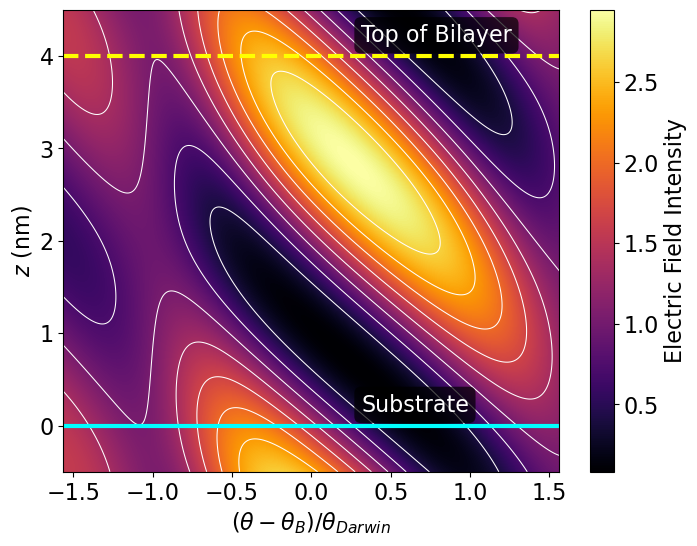

In [ ]:
import dill
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt


import os 

from pathlib import Path
data_dir = Path("../data_archive")
result_dir = Path("../result_archive")
plot_dir = Path("../figure_archive")


thbragg = .465 
thdarwin = .016
# Load the standing wave data
names = ['10', '5a', '2']
names = [result_dir / f"{name}_standing_wave.pkl" for name in names]

with open(names[0], 'rb') as fd:
    data = dill.load(fd)

# print(data.keys())  # Debugging check to see available keys

# Define a global font size scaling variable
label_size = 16  # Adjust this to control all label sizes

# Define z-range and theta-range
zlist = np.linspace(-0.5, 4.5, 1000) * scc.nano  # Convert to meters
thmin = 0.44 * scc.degree  # Convert min angle to radians
thmax = 0.49 * scc.degree  # Convert max angle to radians
theta = np.linspace(thmin, thmax, 1000)  # Define theta range

# Evaluate the standing wave intensity over the grid
ivals = data.SW(zlist, theta)

# Convert axes to nanometers and degrees for correct labeling
z_nm = zlist / scc.nano  # Convert meters to nm
theta_deg = np.degrees(theta)  # Convert radians to degrees
theta_deg = (theta_deg-thbragg)/thdarwin

# Create a meshgrid for contour plotting
Theta_mesh, Z_mesh = np.meshgrid(theta_deg, z_nm)

# Plot the standing wave intensity with contours
plt.figure(figsize=(8, 6))
plt.imshow(
    ivals, aspect='auto',
    extent=[theta_deg[0], theta_deg[-1], z_nm[0], z_nm[-1]],  # Correct physical scale
    origin='lower', cmap='inferno'  # Flip y-axis so lower z values are at bottom
)

# Fix: Adjust colorbar font size properly
cbar = plt.colorbar()  # Create the colorbar
cbar.ax.set_ylabel("Electric Field Intensity", fontsize=label_size)  # Set label size
cbar.ax.tick_params(labelsize=label_size)  # Set tick label size

# Adjust axis labels and tick sizes
plt.xlabel(r'$\left(\theta - \theta_B\right)/\theta_{Darwin}$ ', fontsize=label_size)  # x-axis labeled in degrees
plt.ylabel(r'$z$ (nm)', fontsize=label_size)  # y-axis labeled in nanometers
plt.xticks(fontsize=label_size)
plt.yticks(fontsize=label_size)

# Remove the title
# plt.title("X-ray Standing Wave Intensity")

# Add contour lines on top of the heatmap
contour_levels = np.linspace(np.min(ivals), np.max(ivals), 10)  # Adjust number of contours
contour_lines = plt.contour(Theta_mesh, Z_mesh, ivals, levels=contour_levels, colors='white', linewidths=0.75)

# Add a thick horizontal bar at z = 0 nm (Substrate)
plt.axhline(y=0, color='cyan', linewidth=3, label="Substrate")  # Solid thick line
plt.text(
    theta_deg[-1] - 0.4 * (theta_deg[-1] - theta_deg[0]), 0.1, "Substrate",
    color='white', fontsize=label_size, verticalalignment='bottom',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')  # Black background
)

# Add a thick dashed bar at z = 4 nm (Top of Bilayer)
plt.axhline(y=4, color='yellow', linestyle='dashed', linewidth=3, label="Top of Bilayer")  # Dashed thick line
plt.text(
    theta_deg[-1] - 0.4 * (theta_deg[-1] - theta_deg[0]), 4.1, "Top of Bilayer",
    color='white', fontsize=label_size, verticalalignment='bottom',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')  # Black background
)
plt.savefig('standing_wave_figure.png')

plt.show()
